In [1023]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [1024]:
past_results= pd.read_csv('https://raw.githubusercontent.com/rajupreti/PersonalProjects/main/Olympic_Prediction_ML/olympic_games.csv')

In [1025]:
past_results.head()

,year,games_type,host_country,host_city,athletes,teams,competitions,country,gold,silver,bronze
0,2022,Winter,China,Beijing,2834,91,109,Australia,1,2,1
1,2022,Winter,China,Beijing,2834,91,109,Austria,7,7,4
2,2022,Winter,China,Beijing,2834,91,109,Belarus,0,2,0
3,2022,Winter,China,Beijing,2834,91,109,Belgium,1,0,1
4,2022,Winter,China,Beijing,2834,91,109,Canada,4,8,14


In [1026]:
past_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          1781 non-null   int64 
 1   games_type    1781 non-null   object
 2   host_country  1781 non-null   object
 3   host_city     1781 non-null   object
 4   athletes      1781 non-null   int64 
 5   teams         1781 non-null   int64 
 6   competitions  1781 non-null   int64 
 7   country       1781 non-null   object
 8   gold          1781 non-null   int64 
 9   silver        1781 non-null   int64 
 10  bronze        1781 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 153.2+ KB


In [1027]:
past_results.isna().sum()

year            0
games_type      0
host_country    0
host_city       0
athletes        0
teams           0
competitions    0
country         0
gold            0
silver          0
bronze          0
dtype: int64

In [1028]:
fpast_results= past_results[past_results['games_type']=='Summer']

In [1029]:
fpast_results

,year,games_type,host_country,host_city,athletes,teams,competitions,country,gold,silver,bronze
29,2020,Summer,Japan,Tokyo,11420,206,339,Argentina,0,1,2
30,2020,Summer,Japan,Tokyo,11420,206,339,Armenia,0,2,2
31,2020,Summer,Japan,Tokyo,11420,206,339,Australia,17,7,22
32,2020,Summer,Japan,Tokyo,11420,206,339,Austria,1,1,5
33,2020,Summer,Japan,Tokyo,11420,206,339,Azerbaijan,0,3,4
...,...,...,...,...,...,...,...,...,...,...,...
1776,1896,Summer,Greece,Athens,241,14,43,Hungary,2,1,3
1777,1896,Summer,Greece,Athens,241,14,43,Mixed team,1,0,1
1778,1896,Summer,Greece,Athens,241,14,43,Switzerland,1,2,0
1779,1896,Summer,Greece,Athens,241,14,43,United Kingdom,3,3,3


In [1030]:
fpast_results.describe()

,year,athletes,teams,competitions,gold,silver,bronze
count,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000
mean,1979.363704,7603.253174,137.930545,227.680358,4.106796,4.079164,4.422704
std,32.966190,3359.694641,66.760535,77.603767,8.496448,7.144024,6.867133
min,1896.000000,241.000000,12.000000,43.000000,0.000000,0.000000,0.000000
25%,1956.000000,4955.000000,72.000000,151.000000,0.000000,0.000000,1.000000
50%,1988.000000,8397.000000,159.000000,237.000000,1.000000,2.000000,2.000000
75%,2008.000000,10651.000000,204.000000,302.000000,4.000000,5.000000,5.000000
max,2020.000000,11420.000000,207.000000,339.000000,83.000000,78.000000,77.000000


In [1031]:
fpast_results['condition'] = np.where((fpast_results['host_country'].astype(str) == fpast_results['country']) | (fpast_results['host_country'] == 'Great Britain') & (fpast_results['country'] == 'United Kingdom')|(fpast_results['host_country'] == 'China') & (fpast_results['country'] == 'Chinese Taipei'), 1, 0)

<ipython-input-1031-7639bcb5c6d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fpast_results['condition'] = np.where((fpast_results['host_country'].astype(str) == fpast_results['country']) | (fpast_results['host_country'] == 'Great Britain') & (fpast_results['country'] == 'United Kingdom')|(fpast_results['host_country'] == 'China') & (fpast_results['country'] == 'Chinese Taipei'), 1, 0)


The condition being- when game the is hosted in home country.

In [1032]:
fpast_results

,year,games_type,host_country,host_city,athletes,teams,competitions,country,gold,silver,bronze,condition
29,2020,Summer,Japan,Tokyo,11420,206,339,Argentina,0,1,2,0
30,2020,Summer,Japan,Tokyo,11420,206,339,Armenia,0,2,2,0
31,2020,Summer,Japan,Tokyo,11420,206,339,Australia,17,7,22,0
32,2020,Summer,Japan,Tokyo,11420,206,339,Austria,1,1,5,0
33,2020,Summer,Japan,Tokyo,11420,206,339,Azerbaijan,0,3,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1776,1896,Summer,Greece,Athens,241,14,43,Hungary,2,1,3,0
1777,1896,Summer,Greece,Athens,241,14,43,Mixed team,1,0,1,0
1778,1896,Summer,Greece,Athens,241,14,43,Switzerland,1,2,0,0
1779,1896,Summer,Greece,Athens,241,14,43,United Kingdom,3,3,3,0


In [1033]:
fpast_results[fpast_results['condition']==1]

,year,games_type,host_country,host_city,athletes,teams,competitions,country,gold,silver,bronze,condition
73,2020,Summer,Japan,Tokyo,11420,206,339,Japan,27,14,17,1
162,2016,Summer,Brazil,Rio,11238,207,306,Brazil,7,6,6,1
345,2012,Summer,Great Britain,London,10568,204,302,United Kingdom,29,18,18,1
391,2008,Summer,China,Beijing,10942,204,302,Chinese Taipei,1,1,2,1
517,2004,Summer,Greece,Athens,10625,201,301,Greece,6,6,4,1
590,2000,Summer,Australia,Sydney,10651,199,300,Australia,16,25,17,1
847,1992,Summer,Spain,Barcelona,9356,169,257,Spain,13,7,2,1
914,1988,Summer,Republic of Korea,Seoul,8397,159,237,Republic of Korea,12,10,11,1
1038,1980,Summer,USSR,Moscow,5179,80,203,USSR,80,69,46,1
1070,1976,Summer,Canada,Montreal,6084,92,198,Canada,0,5,6,1


In [1034]:
cor_result= fpast_results[["condition","gold","silver","bronze"]]

In [1035]:
cor_result.corr()["condition"]

condition    1.000000
gold         0.224965
silver       0.245217
bronze       0.211443
Name: condition, dtype: float64

Currently, according to the data-
There is minimal correlation between gold/silver/bronze and our condition i.e., when game the is hosted in home country.

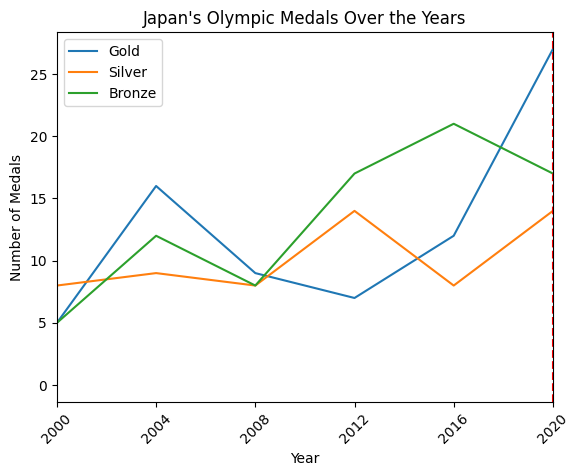

In [1036]:
data= fpast_results[fpast_results['country']=='Japan']
sns.lineplot(data= data, x="year", y="gold", label="Gold")
sns.lineplot(data= data, x="year", y="silver", label="Silver")
sns.lineplot(data= data, x="year", y="bronze", label="Bronze")
plt.xlabel("Year")
plt.ylabel("Number of Medals")
plt.title("Japan's Olympic Medals Over the Years")
plt.xticks(range(2000, 2021, 4))
plt.tick_params(axis='x', rotation=45)
plt.xlim(2000, 2020)
highlighted_year = fpast_results[(fpast_results['condition'] == 1) & (fpast_results['country'] == 'Japan')]['year'].values[0]
plt.axvline(x=highlighted_year, color='red', linestyle='--')
plt.legend()
plt.show()

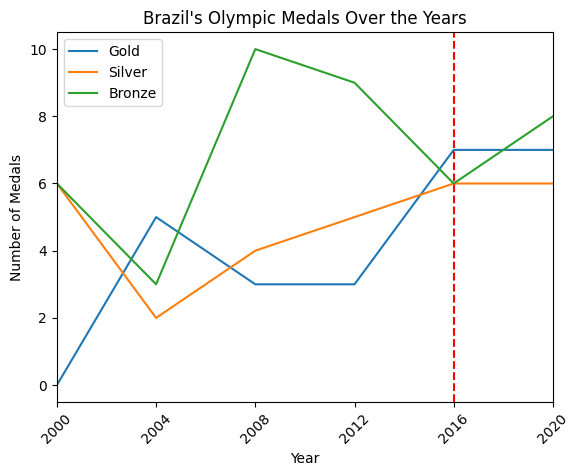

In [1037]:
data= fpast_results[fpast_results['country']=='Brazil']
sns.lineplot(data= data, x="year", y="gold", label="Gold")
sns.lineplot(data= data, x="year", y="silver", label="Silver")
sns.lineplot(data= data, x="year", y="bronze", label="Bronze")
plt.xlabel("Year")
plt.ylabel("Number of Medals")
plt.title("Brazil's Olympic Medals Over the Years")
plt.xticks(range(2000, 2021, 4))
plt.tick_params(axis='x', rotation=45)
plt.xlim(2000, 2020)
highlighted_year = fpast_results[(fpast_results['condition'] == 1) & (fpast_results['country'] == 'Brazil')]['year'].values[0]
plt.axvline(x=highlighted_year, color='red', linestyle='--')
plt.legend()
plt.show()

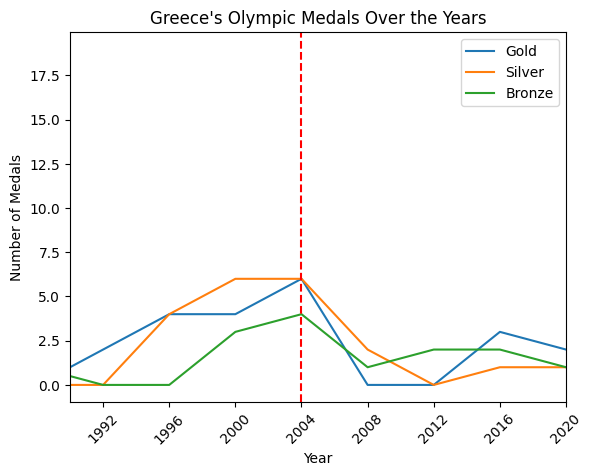

In [1038]:
data= fpast_results[fpast_results['country']=='Greece']
sns.lineplot(data= data, x="year", y="gold", label="Gold")
sns.lineplot(data= data, x="year", y="silver", label="Silver")
sns.lineplot(data= data, x="year", y="bronze", label="Bronze")
plt.xlabel("Year")
plt.ylabel("Number of Medals")
plt.title("Greece's Olympic Medals Over the Years")
plt.xticks(range(1992, 2021, 4))
plt.tick_params(axis='x', rotation=45)
plt.xlim(1990, 2020)
highlighted_year = fpast_results[(fpast_results['condition'] == 1) & (fpast_results['country'] == 'Greece')]['year'].values[0]
plt.axvline(x=highlighted_year, color='red', linestyle='--')
plt.legend()
plt.show()

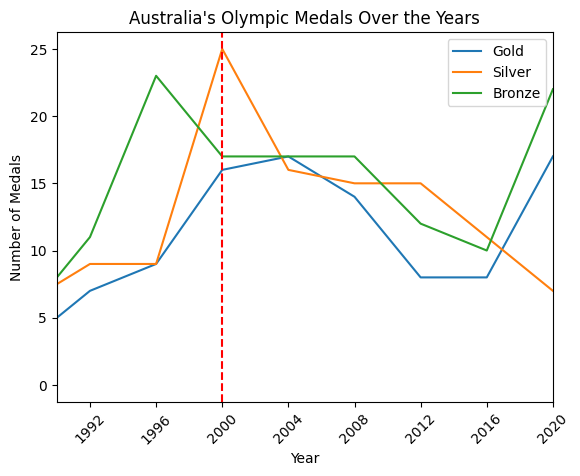

In [1039]:
data= fpast_results[fpast_results['country']=='Australia']
sns.lineplot(data= data, x="year", y="gold", label="Gold")
sns.lineplot(data= data, x="year", y="silver", label="Silver")
sns.lineplot(data= data, x="year", y="bronze", label="Bronze")
plt.xlabel("Year")
plt.ylabel("Number of Medals")
plt.title("Australia's Olympic Medals Over the Years")
plt.xticks(range(1992, 2021, 4))
plt.tick_params(axis='x', rotation=45)
plt.xlim(1990, 2020)
highlighted_year = fpast_results[(fpast_results['condition'] == 1) & (fpast_results['country'] == 'Australia')]['year'].values[0]
plt.axvline(x=highlighted_year, color='red', linestyle='--')
plt.legend()
plt.show()

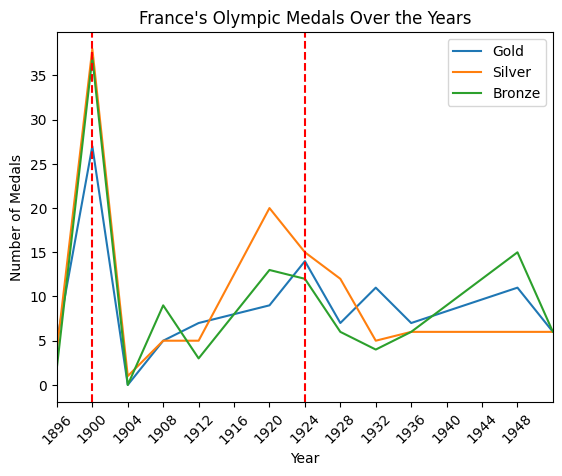

In [1040]:
data= fpast_results[fpast_results['country']=='France']
sns.lineplot(data= data, x="year", y="gold", label="Gold")
sns.lineplot(data= data, x="year", y="silver", label="Silver")
sns.lineplot(data= data, x="year", y="bronze", label="Bronze")
plt.xlabel("Year")
plt.ylabel("Number of Medals")
plt.title("France's Olympic Medals Over the Years")
plt.xticks(range(1896, 1952, 4))
plt.tick_params(axis='x', rotation=45)
plt.xlim(1896, 1952)
highlighted_years = fpast_results[(fpast_results['condition'] == 1) & (fpast_results['country'] == 'France')]['year']
if isinstance(highlighted_years, int):
    highlighted_years = highlighted_years.tolist()

for year in highlighted_years:
    plt.axvline(x=year, color='red', linestyle='--')

plt.legend()
plt.show()

Through graphical representation we can see correlation between gold/silver/bronze when the event is hosted by country. We can see increase in number of golds or points in general when compared with the previous result.

In [1041]:
clean_results= fpast_results[fpast_results['condition']==1]
clean_results[['year','host_country','gold']]

,year,host_country,gold
73,2020,Japan,27
162,2016,Brazil,7
345,2012,Great Britain,29
391,2008,China,1
517,2004,Greece,6
590,2000,Australia,16
847,1992,Spain,13
914,1988,Republic of Korea,12
1038,1980,USSR,80
1070,1976,Canada,0


In [1042]:
clean_results['past_year'] = clean_results['year'] - 4

<ipython-input-1042-af27f72ba7d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_results['past_year'] = clean_results['year'] - 4


In [1043]:
clean_results.drop(index=clean_results[clean_results['year'] == 1896].index, inplace=True)
clean_results.drop(columns=['games_type','athletes','teams','competitions','silver','bronze','host_country'], axis= 1, inplace= True)
clean_results

<ipython-input-1043-7dde8da0d90e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_results.drop(index=clean_results[clean_results['year'] == 1896].index, inplace=True)
<ipython-input-1043-7dde8da0d90e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_results.drop(columns=['games_type','athletes','teams','competitions','silver','bronze','host_country'], axis= 1, inplace= True)


,year,host_city,country,gold,condition,past_year
73,2020,Tokyo,Japan,27,1,2016
162,2016,Rio,Brazil,7,1,2012
345,2012,London,United Kingdom,29,1,2008
391,2008,Beijing,Chinese Taipei,1,1,2004
517,2004,Athens,Greece,6,1,2000
590,2000,Sydney,Australia,16,1,1996
847,1992,Barcelona,Spain,13,1,1988
914,1988,Seoul,Republic of Korea,12,1,1984
1038,1980,Moscow,USSR,80,1,1976
1070,1976,Montreal,Canada,0,1,1972


In [1044]:
key= clean_results.drop(columns=['year', 'host_city','gold'])
key

,country,condition,past_year
73,Japan,1,2016
162,Brazil,1,2012
345,United Kingdom,1,2008
391,Chinese Taipei,1,2004
517,Greece,1,2000
590,Australia,1,1996
847,Spain,1,1988
914,Republic of Korea,1,1984
1038,USSR,1,1976
1070,Canada,1,1972


In [1045]:
fpast_results.rename(columns={"year": "past_year"}, inplace=True)
merge_key= pd.merge(fpast_results, key, on=["past_year","country"])
merge_key= merge_key.drop(columns=['games_type','host_country','host_city','athletes','teams','competitions','silver','bronze','condition_y','condition_x'])
merge_key.rename(columns={"gold": "past_gold"}, inplace=True)
merge_key

<ipython-input-1045-f69c9377a8d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fpast_results.rename(columns={"year": "past_year"}, inplace=True)


,past_year,country,past_gold
0,2016,Japan,12
1,2012,Brazil,3
2,2008,United Kingdom,19
3,2004,Chinese Taipei,2
4,2000,Greece,4
5,1996,Australia,9
6,1988,Spain,1
7,1984,Republic of Korea,6
8,1976,USSR,49
9,1972,Canada,0


In [1046]:
clean_results= pd.merge(clean_results, merge_key, on=["past_year","country"])
clean_results['difference'] = clean_results['gold'] - clean_results['past_gold']
clean_results

,year,host_city,country,gold,condition,past_year,past_gold,difference
0,2020,Tokyo,Japan,27,1,2016,12,15
1,2016,Rio,Brazil,7,1,2012,3,4
2,2012,London,United Kingdom,29,1,2008,19,10
3,2008,Beijing,Chinese Taipei,1,1,2004,2,-1
4,2004,Athens,Greece,6,1,2000,4,2
5,2000,Sydney,Australia,16,1,1996,9,7
6,1992,Barcelona,Spain,13,1,1988,1,12
7,1988,Seoul,Republic of Korea,12,1,1984,6,6
8,1980,Moscow,USSR,80,1,1976,49,31
9,1976,Montreal,Canada,0,1,1972,0,0


Correlation between the host country and number of golds.

In [1047]:
data_set = fpast_results.drop(columns=['games_type','host_country','athletes','teams','competitions','silver','bronze'])
data_set.rename(columns={"past_year": "year"}, inplace=True)
data_set

,year,host_city,country,gold,condition
29,2020,Tokyo,Argentina,0,0
30,2020,Tokyo,Armenia,0,0
31,2020,Tokyo,Australia,17,0
32,2020,Tokyo,Austria,1,0
33,2020,Tokyo,Azerbaijan,0,0
...,...,...,...,...,...
1776,1896,Athens,Hungary,2,0
1777,1896,Athens,Mixed team,1,0
1778,1896,Athens,Switzerland,1,0
1779,1896,Athens,United Kingdom,3,0


In [1048]:
data_set['past_year'] = data_set['year'] - 4
data_set.drop(index=data_set[data_set['year'] == 1896].index, inplace=True)
data_set

,year,host_city,country,gold,condition,past_year
29,2020,Tokyo,Argentina,0,0,2016
30,2020,Tokyo,Armenia,0,0,2016
31,2020,Tokyo,Australia,17,0,2016
32,2020,Tokyo,Austria,1,0,2016
33,2020,Tokyo,Azerbaijan,0,0,2016
...,...,...,...,...,...,...
1765,1900,Paris,Switzerland,6,0,1896
1766,1900,Paris,Germany,4,0,1896
1767,1900,Paris,Italy,3,0,1896
1768,1900,Paris,Australia,2,0,1896


In [1049]:
set_key= data_set.drop(columns=['year','host_city','condition','gold'])
set_key

,country,past_year
29,Argentina,2016
30,Armenia,2016
31,Australia,2016
32,Austria,2016
33,Azerbaijan,2016
...,...,...
1765,Switzerland,1896
1766,Germany,1896
1767,Italy,1896
1768,Australia,1896


In [1050]:
fpast_results.rename(columns={"year": "past_year"}, inplace=True)
merge_set= pd.merge(fpast_results, set_key, on=["past_year","country"])
merge_set= merge_set.drop(columns=['games_type','host_country','host_city','athletes','teams','competitions','silver','bronze','condition'])
merge_set.rename(columns={"gold": "past_gold"}, inplace=True)
merge_set

<ipython-input-1050-35147d28fbe5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fpast_results.rename(columns={"year": "past_year"}, inplace=True)


,past_year,country,past_gold
0,2016,Argentina,3
1,2016,Armenia,1
2,2016,Australia,8
3,2016,Austria,0
4,2016,Azerbaijan,1
...,...,...,...
968,1896,France,5
969,1896,Germany,7
970,1896,Mixed team,1
971,1896,Switzerland,1


In [1051]:
data_set = pd.merge(data_set, merge_set, on=["past_year", "country"])
data_set['difference'] = data_set['gold'] - data_set['past_gold']
data_set['Performance'] = np.select(
    [data_set['difference'] > 7, data_set['difference'] < 0],
    ['High', 'Poor'],
    default='Average'
)
data_set

,year,host_city,country,gold,condition,past_year,past_gold,difference,Performance
0,2020,Tokyo,Argentina,0,0,2016,3,-3,Poor
1,2020,Tokyo,Armenia,0,0,2016,1,-1,Poor
2,2020,Tokyo,Australia,17,0,2016,8,9,High
3,2020,Tokyo,Austria,1,0,2016,0,1,Average
4,2020,Tokyo,Azerbaijan,0,0,2016,1,-1,Poor
...,...,...,...,...,...,...,...,...,...
968,1900,Paris,Mixed team,8,0,1896,1,7,Average
969,1900,Paris,Switzerland,6,0,1896,1,5,Average
970,1900,Paris,Germany,4,0,1896,7,-3,Poor
971,1900,Paris,Australia,2,0,1896,2,0,Average


In [1052]:
corr_new= data_set[["condition","difference","gold","past_gold"]]
corr_new.corr()["condition"]

condition     1.000000
difference    0.263869
gold          0.219546
past_gold     0.060653
Name: condition, dtype: float64

Increased correlation :))

In [1053]:
y= data_set['Performance']
x= data_set[['past_gold','condition']]

In [1054]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.7, random_state=2529)

In [1055]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((681, 2), (292, 2), (681,), (292,))

In [1056]:
model = RandomForestClassifier()

In [1057]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [1058]:
y_pred=model.predict(x_test)

In [1059]:
accuracy_score(y_test,y_pred)

0.684931506849315

In [1060]:
confusion_matrix(y_test,y_pred)

array([[142,   4,  41],
       [  2,   0,   2],
       [ 41,   2,  58]])

In [1061]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

     Average       0.77      0.76      0.76       187
        High       0.00      0.00      0.00         4
        Poor       0.57      0.57      0.57       101

    accuracy                           0.68       292
   macro avg       0.45      0.44      0.45       292
weighted avg       0.69      0.68      0.69       292



Prediction for France in 2024 Olympics???

In [1062]:
pred_france= pd.read_csv('https://raw.githubusercontent.com/rajupreti/PersonalProjects/main/Olympic_Prediction_ML/pred_france.csv')

In [1063]:
pred_france.head()

,past_gold,condition
0,10,1


In [1064]:
x2= pred_france[['past_gold','condition']]

In [1065]:
y2= model.predict(x2)

In [1066]:
y2

array(['Average'], dtype=object)

According to the ML model France will get between 11 to 16 golds this Olympics 2024. YaY :))